# Multiple Regression Assignment one:
## The Fifty Startups

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

In [2]:
# Read the data set
startup = pd.read_csv("data/startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Performing EDA

## Checking for null values

In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### There are no Null Values

### Renaming the columns to avoid the naming errors

In [4]:
startup = startup.rename({"R&D Spend": "r_d_spend"}, axis = 1)
startup = startup.rename({"Marketing Spend": "marketing_spend"}, axis = 1)

In [5]:
# Replacing 0 values with nan
startup.replace(0, np.nan, inplace=True)

In [6]:
# drop nan values
startup.dropna(inplace=True)

In [7]:
# Creating a backup copy of startup data
startup_copy = startup.copy()

In [8]:
startup_copy.head()

,r_d_spend,Administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Handling Categorical data column that is State

In [9]:
le = LabelEncoder()
startup["State"] = le.fit_transform(startup["State"].astype(str))

In [10]:
startup.head()

,r_d_spend,Administration,marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


### Visualizing the data using pairplot

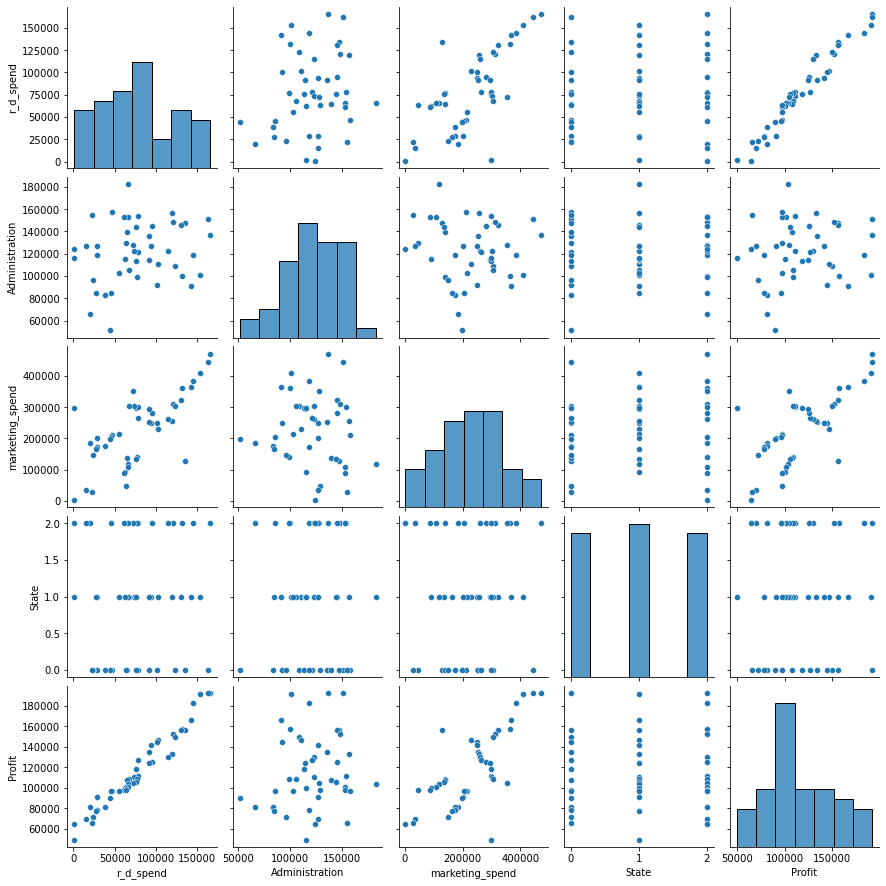

In [11]:
sns.pairplot(startup)

In [12]:
startup.corr()

,r_d_spend,Administration,marketing_spend,State,Profit
r_d_spend,1.000000,0.196068,0.708253,0.068001,0.977703
Administration,0.196068,1.000000,-0.085831,0.061616,0.135076
marketing_spend,0.708253,-0.085831,1.000000,0.105814,0.732277
State,0.068001,0.061616,0.105814,1.000000,0.050151
Profit,0.977703,0.135076,0.732277,0.050151,1.000000


<AxesSubplot:>

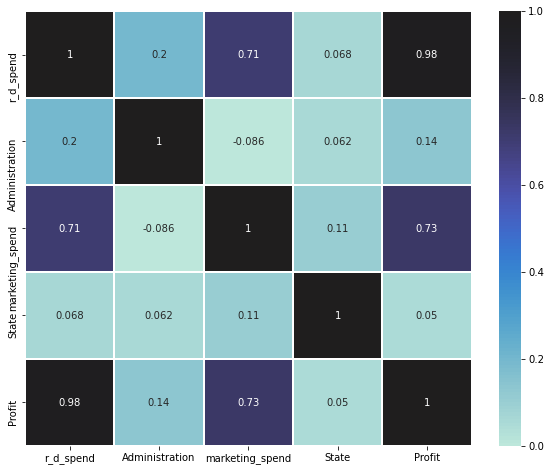

In [13]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(startup.corr(), annot = True, center = True, cbar = True, linewidth = 1, vmin=0, vmax=1)

### Our Dataset has moderate colinearlity as we can see that the marketing_spend and the r_d_spend has a moderate correlation.

### In between Profit and Administration we have the less correlation. So using this columns might lead us to model overfitting as it will not improve our model.

### State column cannot be used for multiple regression so it should be removed
#### and we have to state the Independent variable and dependent variable.

    1. Profit will be the independent variable as we have to predict this variable.
    2. r_d_spend, Administration and marketing_spend will be the dependent variable

### Now we will build some models and check their accuracy using VIF(Variance Inflation Factor)

#### Lets define our Dependent variable and Independent Variable

#### Dependent Variable

 > startup["Profit"]

#### Independent Variables
 > startup["r_d_spend"]

 > startup["Administration"]
 
 > startup["marketing_spend"]

#### We will not take state into consideration as it is categorical

### Without Transformation
#### Lets build first model and i will name it as f_model

> This model will be build using all of our independent variable regardless of their correlation

In [14]:
f_model = smf.ols("Profit~r_d_spend+Administration+marketing_spend", data = startup).fit()

In [15]:
f_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     343.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           1.47e-29
Time:                        09:36:32   Log-Likelihood:                -472.80
No. Observations:                  46   AIC:                             953.6
Df Residuals:                      42   BIC:                             960.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.921e+04   5963.323      9.930      0.000    4.72e+04    7.12e+04
r_d_spend           0.7771      0.038     20.319      0.000       0.700       0.854
Administration     -0.0603      0.044     -1.365      0.179      -0.149       0.029
marketing_spend     0.0193      0.015      1.304      0.199      -0.011       0.049
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.518
Skew:                           0.071   Prob(JB):                        0.772
Kurtosis:                       2.500   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
f_model.params

Intercept          59214.100678
r_d_spend              0.777122
Administration        -0.060287
marketing_spend        0.019257
dtype: float64

In [17]:
rsquared, rsquared_adj, f_aic = (f_model.rsquared, f_model.rsquared_adj, f_model.aic)

In [18]:
print(rsquared)
print(rsquared_adj)
print(f_aic)

0.9608231830180131
0.9580248389478712
953.6014493655733


### Calculating the VIF for independent variables

In [19]:
rsquared_rdspend = smf.ols('r_d_spend~Administration+marketing_spend',data=startup).fit().rsquared  
vif_rdspend = 1/(1-rsquared_rdspend)

rsquared_admin = smf.ols('Administration~marketing_spend+r_d_spend',data=startup).fit().rsquared  
vif_admin = 1/(1-rsquared_admin)

rsquared_marketing = smf.ols('marketing_spend~r_d_spend+Administration',data=startup).fit().rsquared  
vif_marketing = 1/(1-rsquared_marketing)

In [20]:
print(vif_rdspend)
print(vif_admin)
print(vif_marketing)

2.315286396444345
1.1624511361196475
2.2428030670473493


In [21]:
vif_values = {"Variables":["rd_spend", "administration", "marketing_spend"], "vif_values":[vif_rdspend, vif_admin, vif_marketing]}

In [22]:
vif_values_df = pd.DataFrame(vif_values)

In [23]:
vif_values_df

,Variables,vif_values
0,rd_spend,2.315286
1,administration,1.162451
2,marketing_spend,2.242803


### This means we have moderate colinearity in our dataset

> Greater than 5 value of vif means high colinearity

> 1 - 5 means moderate colinearity

> 1 means no or very less collinearity

## Homoscedasticity

In [24]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

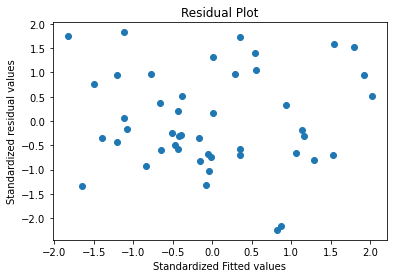

In [25]:
plt.scatter(get_standardized_values(f_model.fittedvalues),
            get_standardized_values(f_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Picking a sample from our original dataset for predicting data

In [26]:
sample_data = startup.sample(10)

In [27]:
sample_data

,r_d_spend,Administration,marketing_spend,State,Profit
14,119943.24,156547.42,256512.92,1,132602.65
20,76253.86,113867.30,298664.47,0,118474.03
13,91992.39,135495.07,252664.93,0,134307.35
31,61136.38,152701.92,88218.23,2,97483.56
29,65605.48,153032.06,107138.38,2,101004.64
44,22177.74,154806.14,28334.72,0,65200.33
4,142107.34,91391.77,366168.42,1,166187.94
24,77044.01,99281.34,140574.81,2,108552.04
35,46014.02,85047.44,205517.64,2,96479.51
11,100671.96,91790.61,249744.55,0,144259.40


In [28]:
sample_data = sample_data.reset_index()

In [29]:
sample_data = sample_data.drop(["index"], axis=1)

In [30]:
sample_data = sample_data.drop(["State"], axis=1)

In [31]:
sample_data

,r_d_spend,Administration,marketing_spend,Profit
0,119943.24,156547.42,256512.92,132602.65
1,76253.86,113867.30,298664.47,118474.03
2,91992.39,135495.07,252664.93,134307.35
3,61136.38,152701.92,88218.23,97483.56
4,65605.48,153032.06,107138.38,101004.64
5,22177.74,154806.14,28334.72,65200.33
6,142107.34,91391.77,366168.42,166187.94
7,77044.01,99281.34,140574.81,108552.04
8,46014.02,85047.44,205517.64,96479.51
9,100671.96,91790.61,249744.55,144259.40


In [32]:
sample_data_input = sample_data.drop(["Profit"], axis=1)

In [40]:
sample_observed_data = sample_data["Profit"]

In [36]:
sample_data_input.head()

,r_d_spend,Administration,marketing_spend
0,119943.24,156547.42,256512.92
1,76253.86,113867.30,298664.47
2,91992.39,135495.07,252664.93
3,61136.38,152701.92,88218.23
4,65605.48,153032.06,107138.38


## Predicting using f_model

In [37]:
pred_data = f_model.predict(sample_data_input)

In [38]:
pred_data

0    147926.668603
1    117359.463201
2    127400.521662
3     99217.469939
4    103034.956336
5     67661.790167
6    171190.591259
7    115808.452422
8     93803.106855
9    136724.173708
dtype: float64

## Finding RMSE

In [42]:
from sklearn.metrics import mean_squared_error as mse

In [43]:
rmse = mse(sample_observed_data, pred_data, squared = False)

print(rmse)

6622.569797154745


## Preparing model for the transformed data using log 10

In [96]:
new_data2 = startup_copy.drop(["State"], axis=1)

### In our dataset we have 0 values that might decrease the accuracy of the model

In [97]:
# Replacing 0 values with nan
new_data2.replace(0, np.nan, inplace=True)

In [98]:
# drop nan values
new_data2.dropna(inplace=True)

In [99]:
new_data2

,r_d_spend,Administration,marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [100]:
# Transformation of the data
# Log to the base 10 transformation
tr_data = np.log10(new_data2)

In [101]:
tr_data.head()

,r_d_spend,Administration,marketing_spend,Profit
0,5.218402,5.136396,5.673743,5.283893
1,5.211114,5.180062,5.647284,5.282831
2,5.185943,5.004947,5.610590,5.281148
3,5.159484,5.074348,5.583425,5.262218
4,5.152617,4.960907,5.563681,5.220600


<AxesSubplot:>

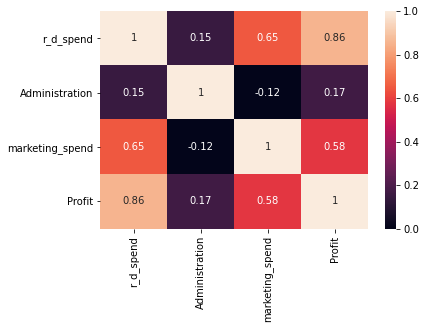

In [102]:
sns.heatmap(tr_data.corr(), annot=True, vmin=0, vmax=1)

In [103]:
tr_log10_model = smf.ols("Profit~r_d_spend+Administration+marketing_spend", data = tr_data).fit()

In [104]:
tr_log10_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     39.36
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           2.85e-12
Time:                        19:44:23   Log-Likelihood:                 57.437
No. Observations:                  46   AIC:                            -106.9
Df Residuals:                      42   BIC:                            -99.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.4071      0.572      5.959      0.000       2.253       4.561
r_d_spend           0.2473      0.033      7.439      0.000       0.180       0.314
Administration      0.0709      0.107      0.660      0.513      -0.146       0.288
marketing_spend     0.0195      0.037      0.525      0.602      -0.055       0.094
==============================================================================
Omnibus:                       11.370   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.255
Skew:                           1.028   Prob(JB):                      0.00360
Kurtosis:                       4.283   Cond. No.                         477.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
tr_rsquared, tr_rsquared_adj, tr_aic = (tr_log10_model.rsquared, tr_log10_model.rsquared_adj, tr_log10_model.aic)

In [106]:
print(tr_rsquared)
print(tr_rsquared_adj)
print(tr_aic)

0.7376373888816573
0.7188972023732043
-106.87424927681423


In [111]:
sample_data2 = new_data2.sample(10)

In [112]:
tr_sample = np.log10(sample_data2)

In [115]:
tr_sample.head()

,r_d_spend,Administration,marketing_spend,Profit
4,5.152617,4.960907,5.563681,5.220600
38,4.305987,4.819201,5.267794,4.909711
44,4.345917,5.189788,4.452319,4.814250
5,5.120169,4.999195,5.559741,5.195875
9,5.091086,5.036146,5.484274,5.175396


In [116]:
tr_predicted_data = tr_log10_model.predict(tr_sample)

In [117]:
tr_predicted_data

4     5.140954
38    4.915811
44    4.936060
5     5.135566
9     5.129524
46    4.643655
36    4.974106
26    5.078314
40    4.971028
7     5.144914
dtype: float64

In [118]:
tr_predict_data = (10**tr_predicted_data)

In [119]:
tr_predict_data

4     138341.826782
38     82377.970492
44     86309.761573
5     136636.378436
9     134748.403870
46     44020.497305
36     94211.985312
26    119760.677980
40     93546.512500
7     139609.244369
dtype: float64

### RMSE of model on log10 transformed data 

In [120]:
rmse2 = mse(sample_data2["Profit"], tr_predict_data, squared = False)

print(rmse2)

16111.66439807379


## Preparing model for the transformed data using natural log

In [121]:
new_data3 = startup_copy.drop(["State"], axis=1)

### In our dataset we have 0 values that might decrease the accuracy of the model

In [122]:
new_data3

,r_d_spend,Administration,marketing_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [125]:
# Transformation of the data
# Log to the base 10 transformation
tr_data = np.log(new_data3)

In [126]:
tr_data.head()

,r_d_spend,Administration,marketing_spend,Profit
0,12.015815,11.826990,13.064277,12.166613
1,11.999034,11.927533,13.003351,12.164167
2,11.941075,11.524316,12.918862,12.160292
3,11.880151,11.684117,12.856311,12.116706
4,11.864338,11.422911,12.810849,12.020875


<AxesSubplot:>

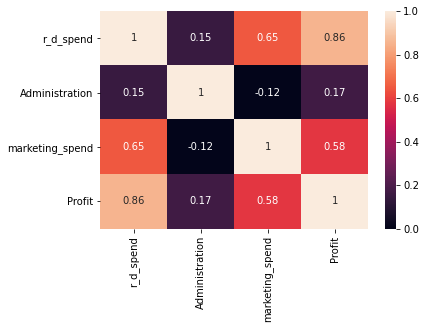

In [127]:
sns.heatmap(tr_data.corr(), annot=True, vmin=0, vmax=1)

In [128]:
tr_log_model = smf.ols("Profit~r_d_spend+Administration+marketing_spend", data = tr_data).fit()

In [129]:
tr_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     39.36
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           2.85e-12
Time:                        19:46:56   Log-Likelihood:                 19.072
No. Observations:                  46   AIC:                            -30.14
Df Residuals:                      42   BIC:                            -22.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.8451      1.316      5.959      0.000       5.188      10.502
r_d_spend           0.2473      0.033      7.439      0.000       0.180       0.314
Administration      0.0709      0.107      0.660      0.513      -0.146       0.288
marketing_spend     0.0195      0.037      0.525      0.602      -0.055       0.094
==============================================================================
Omnibus:                       11.370   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.255
Skew:                           1.028   Prob(JB):                      0.00360
Kurtosis:                       4.283   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
tr_rsquared, tr_rsquared_adj, tr_aic = (tr_log_model.rsquared, tr_log_model.rsquared_adj, tr_log_model.aic)

In [131]:
print(tr_rsquared)
print(tr_rsquared_adj)
print(tr_aic)

0.7376373888816563
0.7188972023732032
-30.143264314002195


In [135]:
sample_data3 = new_data3.sample(10)

In [136]:
sample_data.head()

,r_d_spend,Administration,marketing_spend,Profit
0,1000.23,124153.04,1903.93,64926.08
1,66051.52,182645.56,118148.20,103282.38
2,142107.34,91391.77,366168.42,166187.94
3,120542.52,148718.95,311613.29,152211.77
4,22177.74,154806.14,28334.72,65200.33


In [137]:
tr_sample_log = np.log(sample_data2)

In [138]:
tr_sample_log.head()

,r_d_spend,Administration,marketing_spend,Profit
4,11.864338,11.422911,12.810849,12.020875
38,9.914902,11.096621,12.129543,11.305028
44,10.006844,11.949929,10.251843,11.085220
5,11.789624,11.511071,12.801776,11.963945
9,11.722659,11.596155,12.628007,11.916789


In [146]:
tr_predicted_data_log = tr_log_model.predict(tr_sample_log)

In [147]:
tr_predicted_data_log

4     11.837483
38    11.319073
44    11.365698
5     11.825079
9     11.811165
46    10.692411
36    11.453303
26    11.693251
40    11.446214
7     11.846603
dtype: float64

In [148]:
predict_data_log = np.exp(tr_predicted_data_log)

In [149]:
predict_data_log

4     138341.826782
38     82377.970492
44     86309.761573
5     136636.378436
9     134748.403870
46     44020.497305
36     94211.985312
26    119760.677980
40     93546.512500
7     139609.244369
dtype: float64

In [150]:
rmse3 = mse(sample_data3["Profit"], predict_data_log, squared = False)

print(rmse3)

35836.93610660092


In [152]:
model_results = {"models": ['f_model', 'tr_log10_model', 'tr_log_model'], 
                 "rsquared": [f_model.rsquared, tr_log10_model.rsquared, tr_log_model.rsquared], 
                 "rsquared_adj": [f_model.rsquared_adj, tr_log10_model.rsquared_adj, tr_log_model.rsquared_adj], 
                 "model_aic": [f_model.aic, tr_log10_model.aic, tr_log_model.aic],
                 "model_rmse": [rmse, rmse2, rmse3]}

In [153]:
model_results = pd.DataFrame(model_results)

In [154]:
model_results

,models,rsquared,rsquared_adj,model_aic,model_rmse
0,f_model,0.960823,0.958025,953.601449,5300.886635
1,tr_log10_model,0.737637,0.718897,-106.874249,16111.664398
2,tr_log_model,0.737637,0.718897,-30.143264,35836.936107


#### Model rmse will change as the sample for the testing data is random everytime